In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt

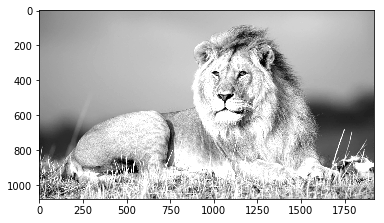

In [2]:

#Task 1a
def intensity(a,image):               #reads image and multiply with constant a, then clip values >255 and <0
    image=image.astype(int)
    image=image*a               
    image[image>255]=255
    image[image<0]=0
    image=image.astype(int)
    
    return image
#Task1 b
def negative(image):#Subtract image from 255
    
    return 255-image


im=cv2.imread("image.jpg",0)
plt.imshow(intensity(1.4,im),cmap='gray')
plt.show()


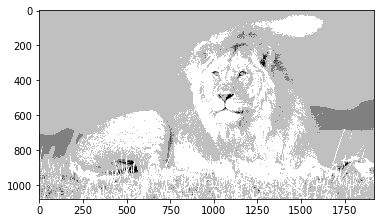

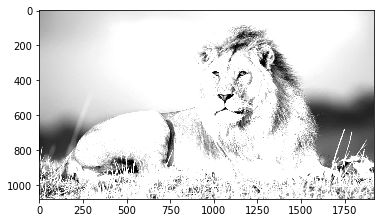

In [3]:
#Task 2 Log functions:

def log_transform(image,c):    #formula implemented for log transformation
    image=image.astype(int)
    image=np.log(1+image)
    image=c*image
    
    image[image>255]=255          #Clipping
    image[image<0]=0
    return image.astype("uint8")


im=cv2.imread("image.jpg",0)
plt.imshow(log_transform(im,0.8),cmap="gray")
plt.show()



def power_transform(image,power,c):   # Power formula implementation
    image=image.astype(int)
    image=np.power(image,power)
    image=c*image 
    image[image>255]=255            #Clipping
    image[image<0]=0
    return image.astype('uint8')

plt.imshow(power_transform(im,1.13,1),cmap="gray")
plt.show()

In [ ]:

#histogram equilization
import collections


plt.rcParams['figure.figsize'] = (15.0, 10.0)
image=cv2.imread("image.jpg")
image=np.average(image,2).astype(int)
print image.ravel().shape


#plt.imshow(imagee,cmap = plt.get_cmap('gray'))      #Shwoing original histogram before equalization 
plt.hist(image.ravel(),256,[0,256])
plt.show()

def his_equi(image): 
    flat=image.flatten            #convert image to 1D
    bins= collections.Counter(flat)  # Calculating relative histogram of image
    total=sum(bins.values())         #total number of ppixels
     

    cdf=np.array(bins.values()).astype(float) 
    cdf=(cdf)/total                            #Calculating individual probalility

    for i in range (1,len(bins)):
        cdf[i]=cdf[i-1]+cdf[i]          # PDF to CDF

    cdf=np.array(cdf)
    cdf=(cdf*255).astype(int)             #calculating new values


    dic ={}
    i=0
    for key in bins.keys():
        dic[key]=cdf[i]             #Assigning new values  to pixels
        i+=1

    equalized=np.zeros_like(flat)            

    for key in bins.keys():
        equalized=np.where(flat==key,dic[key],equalized)   #getting output image equilized and flattened


    return equalized
    
    
    
equalized=his_equi(cv2.imread("image.jpg"))       # plotting quialized image
 
plt.hist(equalized,256,[0,256])
plt.show()

(2073600,)


(1080, 1920)


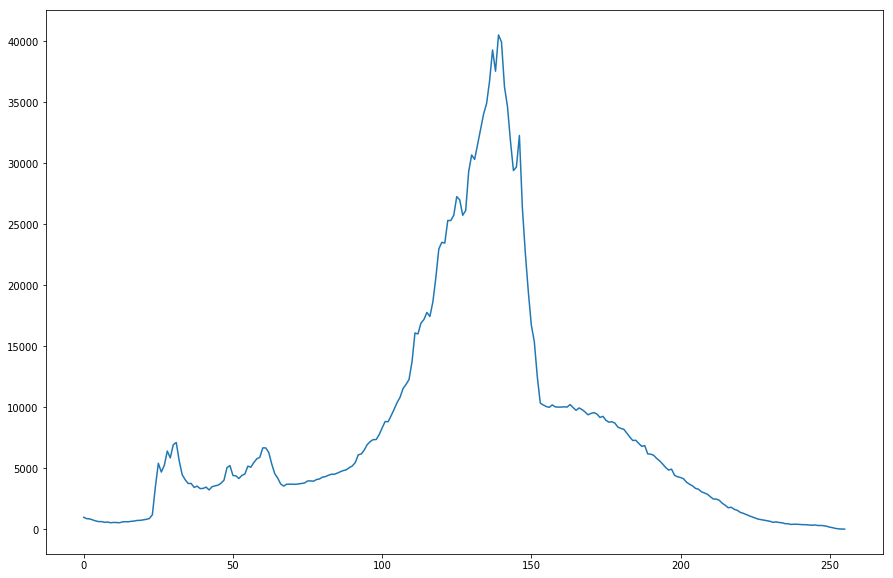

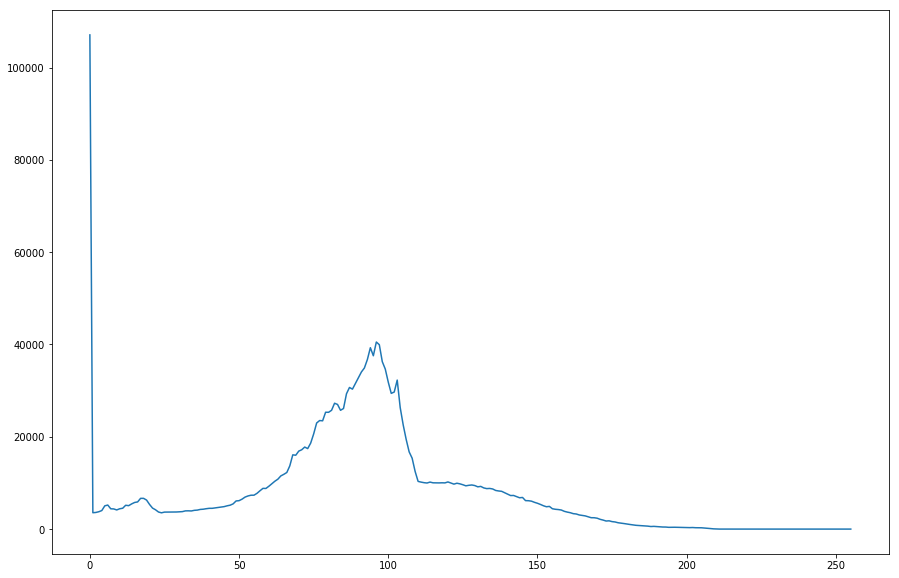

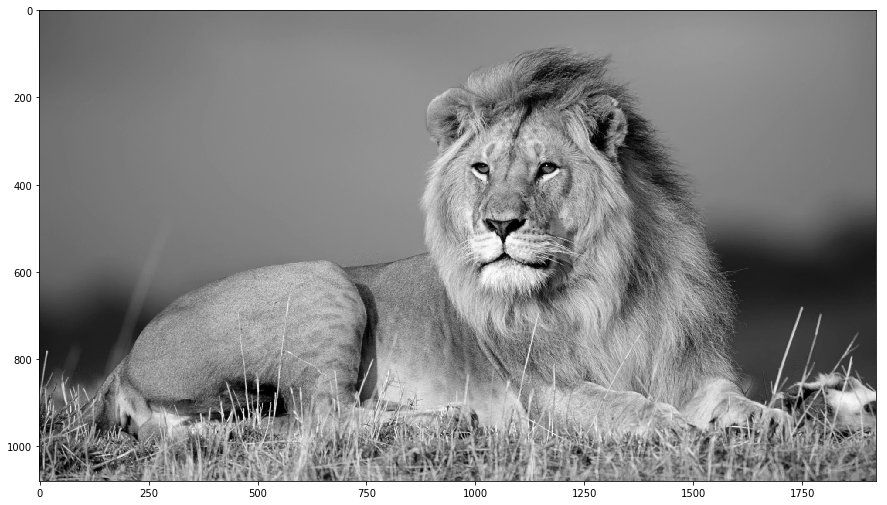

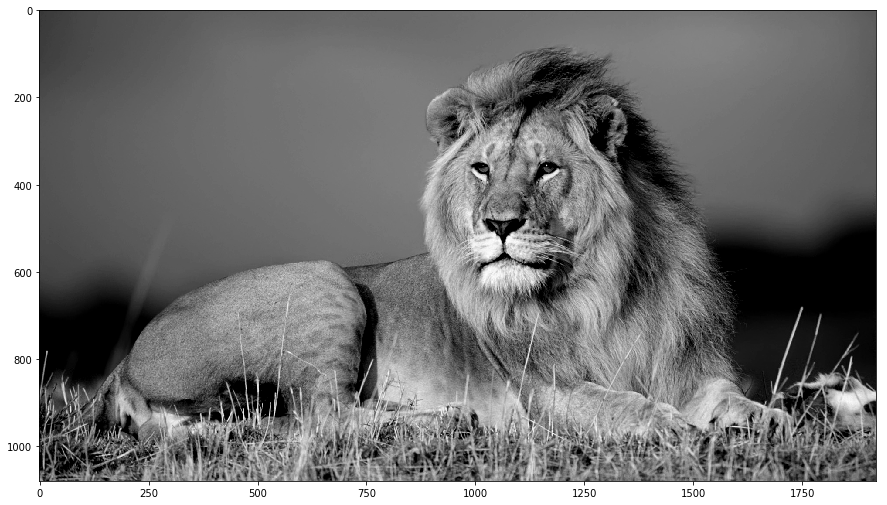

In [3]:
#Task 4


def contrast_stretching(image,clip):  #input image and clipping percentile
    clip_right=clip
    clip_left=100-clip
   
    hist=cv2.calcHist([image],[0],None,[256],[0,256])  # Calculate histogram to get value of c and d
 
    x=np.arange(256)    # for plotting
    tem=np.zeros_like(hist) 
    a=tem[0]=0
    b=255
    plt.plot(x,hist)
    plt.show()
    
    total=np.sum(hist)
    for i in range(1,len(hist)):
        tem[i]=(np.sum(hist[0:i])/total)*100    #getting cummulative histogram
    c = (np.abs(tem-clip_right)).argmin()       #getting index to 5percenile and 95
    d = (np.abs(tem-clip_left)).argmin()
     
    image=image.astype(int)  
    out=((image-c)*((b-a)/((d-c))))+a    # Applying formula
    out[out<0]=0
    out[out>255]=255
    out=out.astype("uint8")
    his=cv2.calcHist([out],[0],None,[256],[0,256])
    x=np.arange(256)

    plt.plot(x,his)
    plt.show()
                                                          # Showing output stretched contrast
    plt.imshow(image,cmap="gray")
    plt.show()
    plt.imshow(out,cmap="gray")
    plt.show()
    
    
    
image=cv2.imread("image.jpg",0)
contrast_stretching( image,5)

In [ ]:
"""Task 4b : No its not advisible to do contrast stretching by just clipping one side of histogram because in
that case histogram will be pushed to extreme gray or extreme white, which might be usable but not what is expected 
contrast stretching
"""